## Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## EDA

In [4]:
df=pd.read_csv('cancer_classification.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

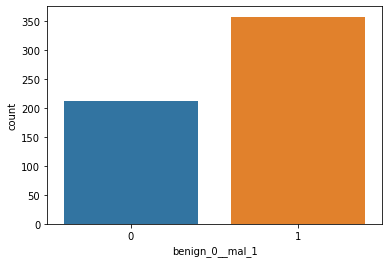

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

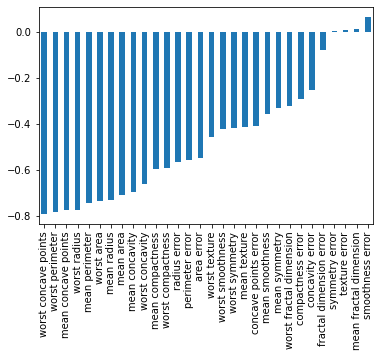

In [7]:
df.corr()['benign_0__mal_1'].sort_values().drop('benign_0__mal_1').plot(kind='bar')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from sklearn.metrics import classification_report,confusion_matrix

## Pre-Processing

In [9]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=101)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train.shape

(426, 30)

## Modeling

In [10]:
model=Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),verbose=1,epochs=600)

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6777 - val_loss: 0.6628
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6524 - val_loss: 0.6371
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6232 - val_loss: 0.5974
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5838 - val_loss: 0.5546
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5401 - val_loss: 0.5083
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4956 - val_loss: 0.4604
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4449 - val_loss: 0.4072
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3938 - val_loss: 0.3561
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3490 - val_loss: 0.3118
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3148 - val_loss: 0.2807
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0517 - val_loss: 0.1193
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.1199
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.1279
Epoch 86/600
14/14 [==============================] - ETA: 0s - loss: 0.080 - 0s 2ms/step - loss: 0.0523 - val_loss: 0.1142
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1263
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.1225
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0496 - val_loss: 0.1187
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0497 - val_loss: 0.1222
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0502 - val_loss: 0.1219
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.

14/14 [==============================] - 0s 3ms/step - loss: 0.0379 - val_loss: 0.1389
Epoch 164/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0408 - val_loss: 0.1372
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.1374
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0376 - val_loss: 0.1298
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0371 - val_loss: 0.1403
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0368 - val_loss: 0.1362
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0372 - val_loss: 0.1350
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.1368
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0380 - val_loss: 0.1340
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0375 - val_loss: 0.1356
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0304 - val_loss: 0.1429
Epoch 245/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0297 - val_loss: 0.1378
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0285 - val_loss: 0.1572
Epoch 247/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0330 - val_loss: 0.1303
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0301 - val_loss: 0.1475
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0292 - val_loss: 0.1427
Epoch 250/600
14/14 [==============================] - ETA: 0s - loss: 0.012 - 0s 5ms/step - loss: 0.0288 - val_loss: 0.1481
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0299 - val_loss: 0.1392
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0290 - val_loss: 0.1510
Epoch 253/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0295

14/14 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.1450
Epoch 326/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.1447
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.1450
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0303 - val_loss: 0.1396
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0325 - val_loss: 0.1402
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0239 - val_loss: 0.1363
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.1454
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.1359
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.1474
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0226 - val_loss: 0.1447
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0195 - val_loss: 0.1445
Epoch 407/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.1493
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.1553
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.1525
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.1550
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.1363
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.1600
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.1351
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.1584
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0187 - val_loss: 0.1514
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.1745
Epoch 488/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0132 - val_loss: 0.1691
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.1728
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0114 - val_loss: 0.1749
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.1661
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0129 - val_loss: 0.1709
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0116 - val_loss: 0.1686
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0118 - val_loss: 0.1888
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.1724
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.1886
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.2017
Epoch 569/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 0.2236
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0114 - val_loss: 0.2066
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.2321
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.2020
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.2110
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.2115
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.2167
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.2166
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0073 - val_loss: 0.2159
Epoc

## Evaluation

<AxesSubplot:>

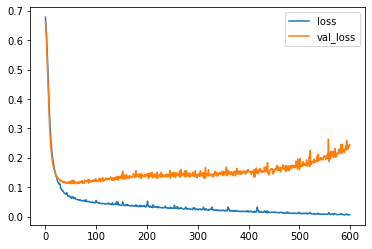

In [11]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [13]:
prediction1=model.predict_classes(X_test)
print(classification_report(y_test,prediction1))
print(confusion_matrix(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.98      0.95      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

[[53  2]
 [ 4 84]]


You can see that the evaluation is very good however it's worth nothing since it is overfitted.

## Address the Overfitting Issue

### Option 1: Early Stopping

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
model_e=Sequential()
model_e.add(Dense(units=30,activation='relu'))
model_e.add(Dense(units=15,activation='relu'))
model_e.add(Dense(units=1,activation='sigmoid'))
model_e.compile(optimizer='adam',loss='binary_crossentropy')
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=25)
model_e.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),verbose=1,epochs=600,callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7082 - val_loss: 0.6840
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6573 - val_loss: 0.6343
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6082 - val_loss: 0.5899
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5635 - val_loss: 0.5464
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5178 - val_loss: 0.4995
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4692 - val_loss: 0.4494
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4210 - val_loss: 0.3999
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3699 - val_loss: 0.3519
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3257 - val_loss: 0.3101
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2929 - val_loss: 0.2776
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0445 - val_loss: 0.1028
Epoch 83/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0421 - val_loss: 0.1096
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0421 - val_loss: 0.1018
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0433 - val_loss: 0.1060
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0431 - val_loss: 0.1102
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0428 - val_loss: 0.1074
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0446 - val_loss: 0.1067
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0410 - val_loss: 0.1024
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0420 - val_loss: 0.0989
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0411 - val_loss: 0.1180
Epoch 92/600


<AxesSubplot:>

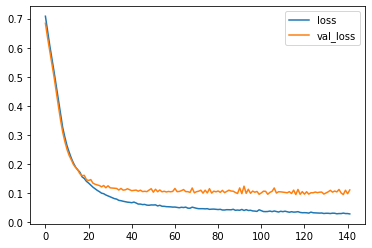

In [20]:
losses=pd.DataFrame(model_e.history.history)
losses.plot()

In [21]:
prediction2=model_e.predict_classes(X_test)
print(classification_report(y_test,prediction2))
print(confusion_matrix(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 3 85]]


### Option 2: Add in DropOut Layers

In [23]:
from tensorflow.keras.layers import Dropout
model_d=Sequential()
model_d.add(Dense(units=30,activation='relu'))
model_d.add(Dropout(0.5))

model_d.add(Dense(units=15,activation='relu'))
model_d.add(Dropout(0.5))

model_d.add(Dense(units=1,activation='sigmoid'))

model_d.compile(optimizer='adam',loss='binary_crossentropy')
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=25)
model_d.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),verbose=1,epochs=600,callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6900 - val_loss: 0.6684
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6754 - val_loss: 0.6551
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6705 - val_loss: 0.6391
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6551 - val_loss: 0.6242
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6429 - val_loss: 0.6097
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6076 - val_loss: 0.5848
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6007 - val_loss: 0.5574
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5768 - val_loss: 0.5276
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5551 - val_loss: 0.4962
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5255 - val_loss: 0.4636
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1094 - val_loss: 0.1005
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1269 - val_loss: 0.1089
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0940 - val_loss: 0.1062
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1139 - val_loss: 0.0919
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1007 - val_loss: 0.0922
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1058 - val_loss: 0.0991
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1217 - val_loss: 0.0924
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1093 - val_loss: 0.1000
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0935 - val_loss: 0.0948
Epoch 00091: early stopping


<AxesSubplot:>

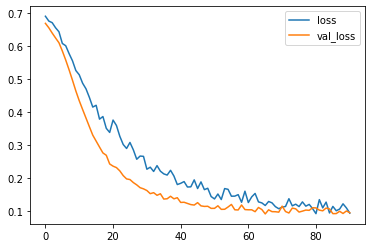

In [24]:
losses=pd.DataFrame(model_d.history.history)
losses.plot()

In [25]:
prediction3=model_d.predict_classes(X_test)
print(classification_report(y_test,prediction3))
print(confusion_matrix(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[54  1]
 [ 2 86]]
